In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read CSV of 5yr historical price data
csv_path = "Data/BTC-USD.csv"
BTC_df = pd.read_csv(csv_path)

BTC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [3]:
# Convert Data column to Datetime
BTC_df["Date"] = pd.to_datetime(BTC_df["Date"])
BTC_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [20]:
# Add columns for pct. gain, difference between high and low
# Split Date column into Day, Month, and Year columns
BTC_df["Pct Gain"] = (BTC_df["Adj Close"] - BTC_df["Open"]) / BTC_df["Open"] * 100
BTC_df["Price Swings"] = BTC_df["High"] - BTC_df["Low"]
#BTC_df["Day"] = BTC_df["Date"].dt.day
#BTC_df["Month"] = BTC_df["Date"].dt.month
#BTC_df["Year"] = BTC_df["Date"].dt.year
BTC_df["MM-DD"] = BTC_df["Date"].dt.strftime('%m-%d')

BTC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pct Gain,Price Swings,MM-DD
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,3.597437,44.381042,01-01
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2.316503,34.687989,01-02
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2.176976,22.479980,01-03
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,10.563956,115.020020,01-04
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-12.392691,280.682984,01-05


In [22]:
# Group by Month and Day, and take the average of the Volume, Pct Gain, and Price Swings columns
BTC_MMDD = BTC_df.groupby(["MM-DD"]).mean()[
    ["Volume", "Pct Gain", "Price Swings"]
]

BTC_MMDD.head()

,Volume,Pct Gain,Price Swings
MM-DD,,,
01-01,1.481183e+10,0.868315,404.398181
01-02,2.219623e+10,4.214800,1357.416113
01-03,2.567280e+10,1.691497,783.040674
01-04,2.531677e+10,2.343353,1249.987061
01-05,2.335222e+10,1.271929,1442.289819


ConversionError: Failed to convert value(s) to axis units: 'vertical'

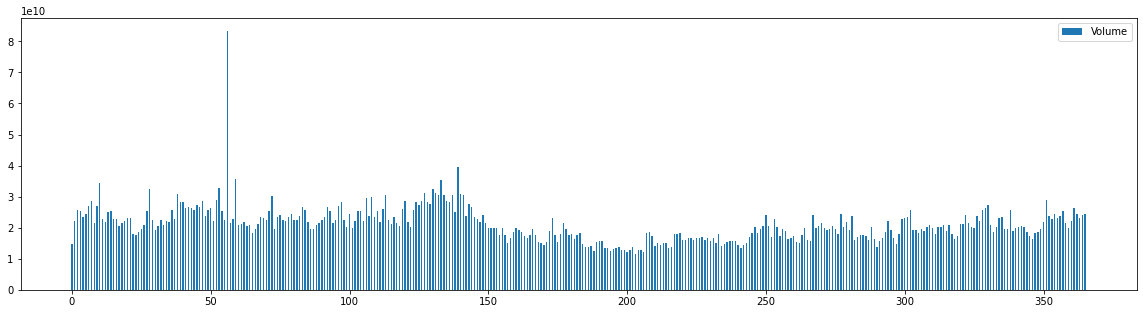

In [35]:
BTC_MMDD.plot.bar(y="Volume", figsize=(20,5), xticks="vertical")
#plt.xticks(rotation=90)

<AxesSubplot:xlabel='MM-DD'>

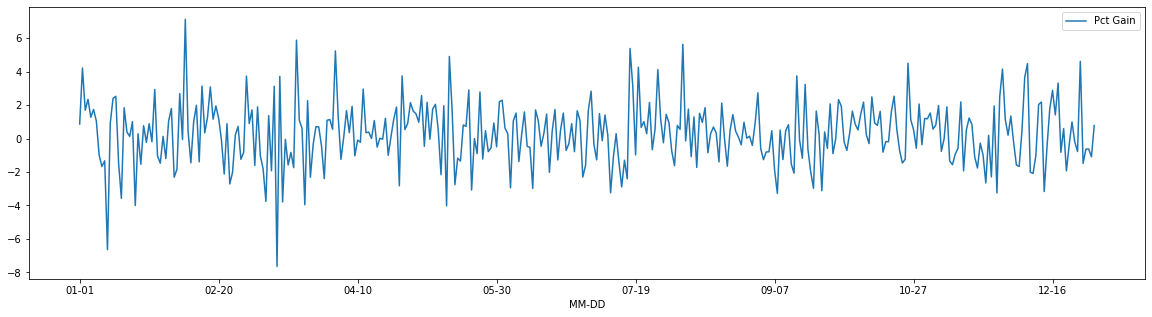

In [32]:
BTC_MMDD.plot(y="Pct Gain", figsize=(20,5))

<AxesSubplot:xlabel='MM-DD'>

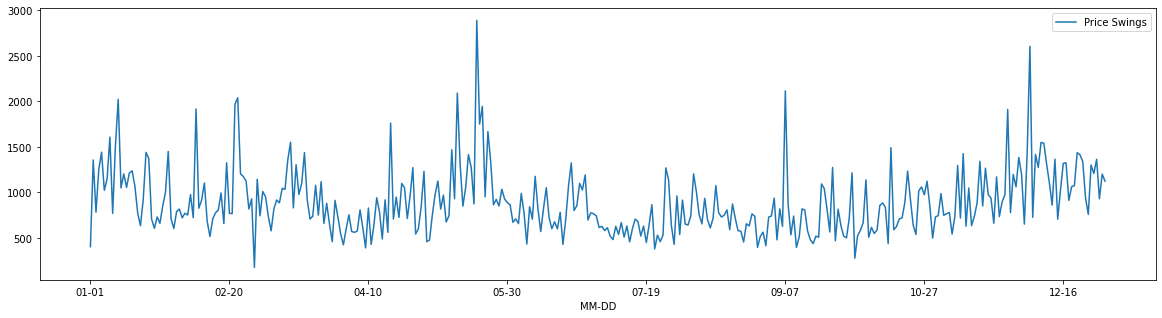

In [29]:
BTC_MMDD.plot(y="Price Swings", figsize=(20,5))

In [ ]:
BTC_df.plot("Date", "Pct Gain", figsize=(20,5))

In [17]:
# Reset index in preparation for pivot
#BTC_month_day = BTC_month_day.reset_index()

In [10]:
# Create a pivot table with Months as index and Days as columns
#BTC_daily_pivot = BTC_month_day.pivot(index="Month", columns="Day", values="Pct Gain")

#BTC_daily_pivot

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
1,0.868315,4.214800,1.691497,2.343353,1.271929,1.737733,1.048075,-0.989124,-1.672945,-1.329776,...,0.287341,-1.537649,0.767860,-0.232131,0.887909,-0.191074,2.934011,-1.045123,-1.474028,0.131849
2,-1.198479,1.050351,1.792721,-2.314756,-1.831440,2.686559,-0.061620,7.125003,0.442439,-1.452221,...,-2.120079,0.891459,-2.713247,-2.019027,0.217245,0.723668,-1.242101,-0.826921,NaN,NaN
3,3.733571,0.894294,1.710419,-1.609002,1.893892,-1.029881,-1.819254,-3.754603,1.366100,-1.930706,...,-3.958850,2.264710,-2.314971,-0.360241,0.710275,0.698124,-0.445594,-2.399634,1.091183,1.135615
4,0.551688,5.237753,1.326541,-1.241757,0.081987,1.668753,0.347306,1.925617,-1.031646,-0.095972,...,0.112843,1.166456,1.882352,-2.826846,3.742251,0.537246,0.896083,2.145838,1.637443,NaN
5,1.476507,0.973015,2.571446,-0.462954,2.162775,-0.043053,1.768287,2.044505,0.506550,-2.160385,...,-0.004053,-0.902195,2.783643,-1.226417,0.466988,-0.782897,-0.553273,0.931847,-0.495161,2.202228
6,2.291175,0.631745,0.299627,-2.943806,1.058733,1.519638,-1.380282,0.217270,1.589686,-0.468661,...,0.504935,1.524629,-0.708682,-0.311993,0.887295,-0.786013,1.658903,1.072681,-2.304654,NaN
7,-1.598056,1.684090,2.832957,-0.339901,-1.274560,1.490533,-0.132850,1.408660,0.203400,-3.244343,...,1.012199,0.286931,2.157788,-0.669923,0.556608,4.126353,1.209934,-0.253929,1.443240,0.948193
8,-0.742381,-1.625896,0.783049,0.548561,5.636117,-0.141767,1.759568,-1.082361,1.296364,-1.727184,...,0.502223,1.432938,0.431991,0.088720,-0.374503,0.971311,0.021496,0.141249,-0.409570,0.905396
9,2.735747,-0.585061,-1.263155,-0.801913,-0.792958,0.470078,-1.876423,-3.279009,0.506915,-1.256583,...,1.643177,0.272203,-3.119936,0.396359,-0.590483,2.072662,-0.900434,-0.013594,2.328223,NaN


In [13]:
#BTC_daily_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       12 non-null     float64
 1   2       12 non-null     float64
 2   3       12 non-null     float64
 3   4       12 non-null     float64
 4   5       12 non-null     float64
 5   6       12 non-null     float64
 6   7       12 non-null     float64
 7   8       12 non-null     float64
 8   9       12 non-null     float64
 9   10      12 non-null     float64
 10  11      12 non-null     float64
 11  12      12 non-null     float64
 12  13      12 non-null     float64
 13  14      12 non-null     float64
 14  15      12 non-null     float64
 15  16      12 non-null     float64
 16  17      12 non-null     float64
 17  18      12 non-null     float64
 18  19      12 non-null     float64
 19  20      12 non-null     float64
 20  21      12 non-null     float64
 21  22      12 non-null     float64
 22  23  

KeyError: 'Day'

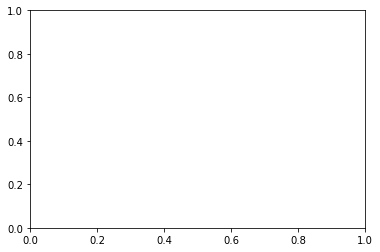

In [18]:
#BTC_daily_pivot.plot()